# Practical Session 3

#### Importing libraries

In [197]:
import numpy as np
import numpy.fft
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
from matplotlib.colors import LogNorm
from sklearn.decomposition import NMF

## 1 Short Time Fourier Transform

### 1.1 Signal interpretation

#### seq.wav

(0.0, 800.0)

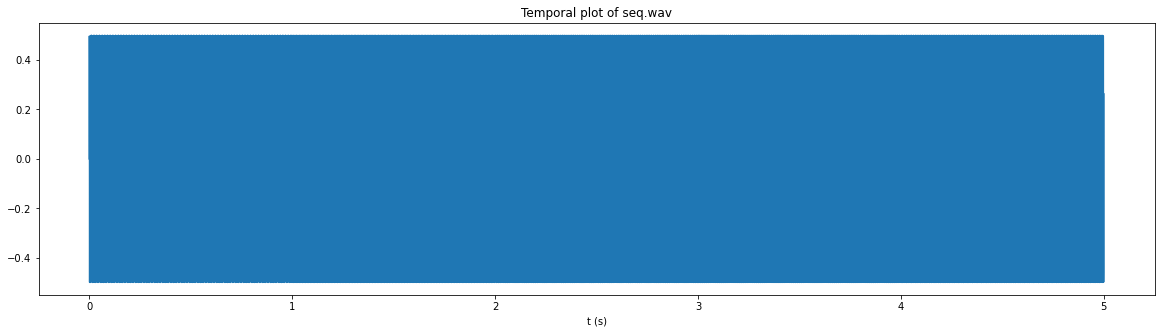

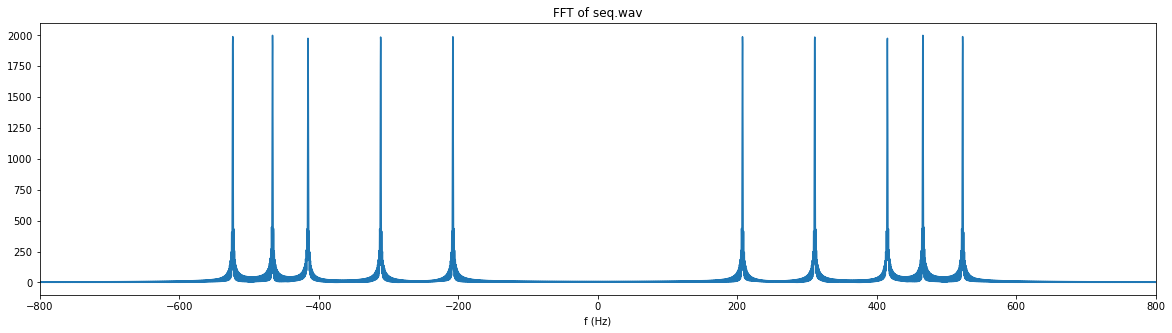

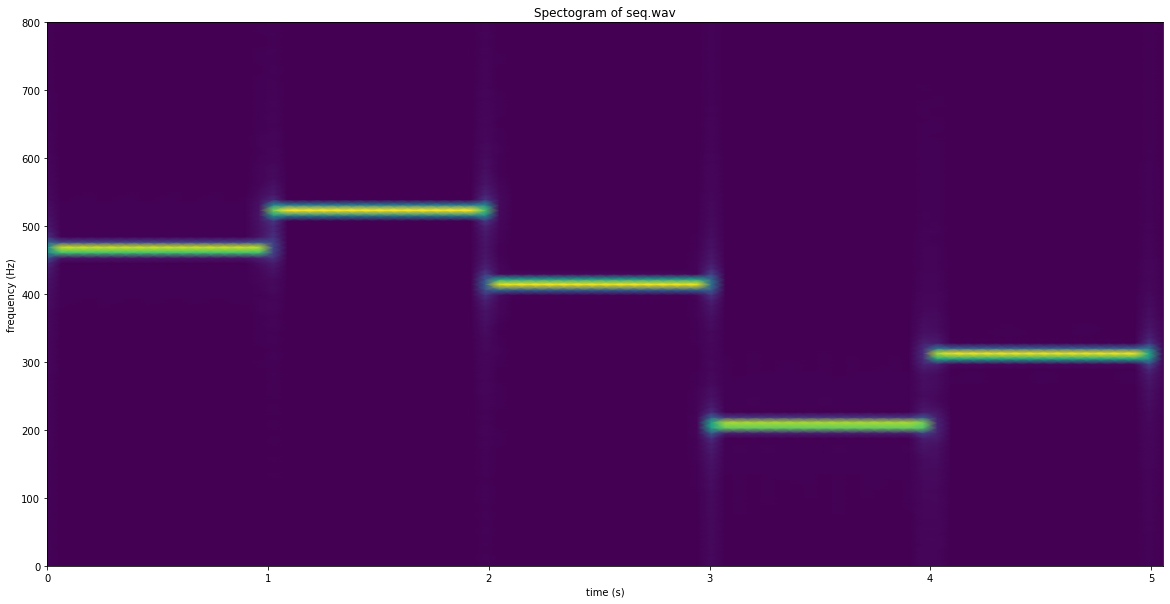

In [198]:
f_s, x = sp.io.wavfile.read("Data/seq.wav")

freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of seq.wav")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.plot(freqs, abs(x_fft))
pl.title("FFT of seq.wav")
pl.xlabel("f (Hz)")
pl.xlim(-800, 800)

f, t, Zxx = sp.signal.stft(x, f_s, window = "hamming", nperseg = 1024)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None)
pl.title("Spectogram of seq.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")
pl.ylim(0, 800)

During each second, the spectrum is constant and is almost a dirac (there are no harmonics) corresponding to the note which is played during that second. Like in the first practical session, we could recover their MIDI numbers from their frequencies. 
<br>Moreover, when the signal transits from one note to the other, there is a vertical line in the spectrogram which corresponds to the brutal change in the signal (which is a concatenation of sine waves of different frequencies) when swapping to the next note. Indeed, a brutal change of note is like a dirac in time.
<br>I used a hamming window for its high frequency resolution, which allows us to be precise on the frequencies of the notes. Also, I chose a pretty high nperseg (1024) for the same reason and because we do not need to be precise in time.

#### drum.wav

(0.0, 4000.0)

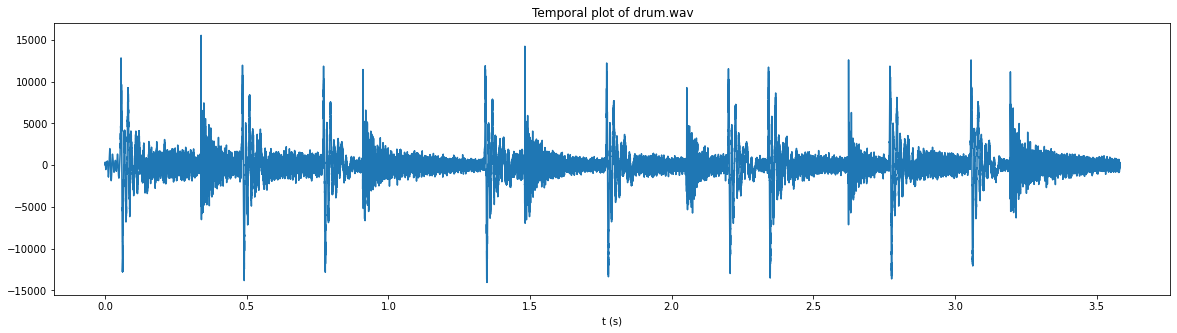

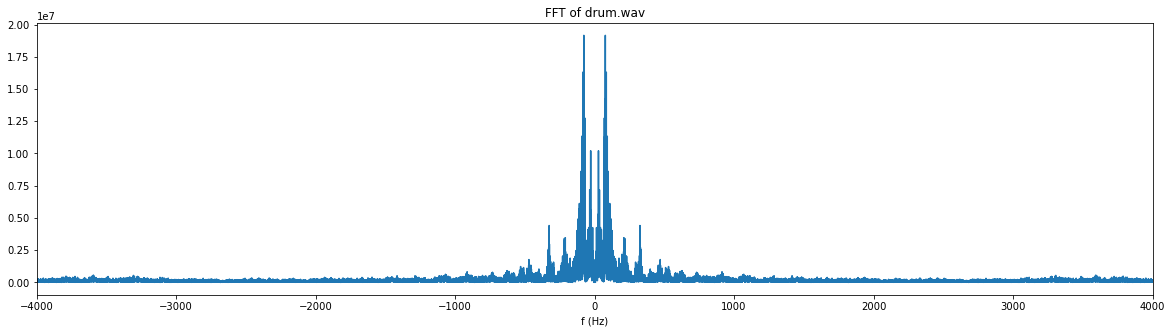

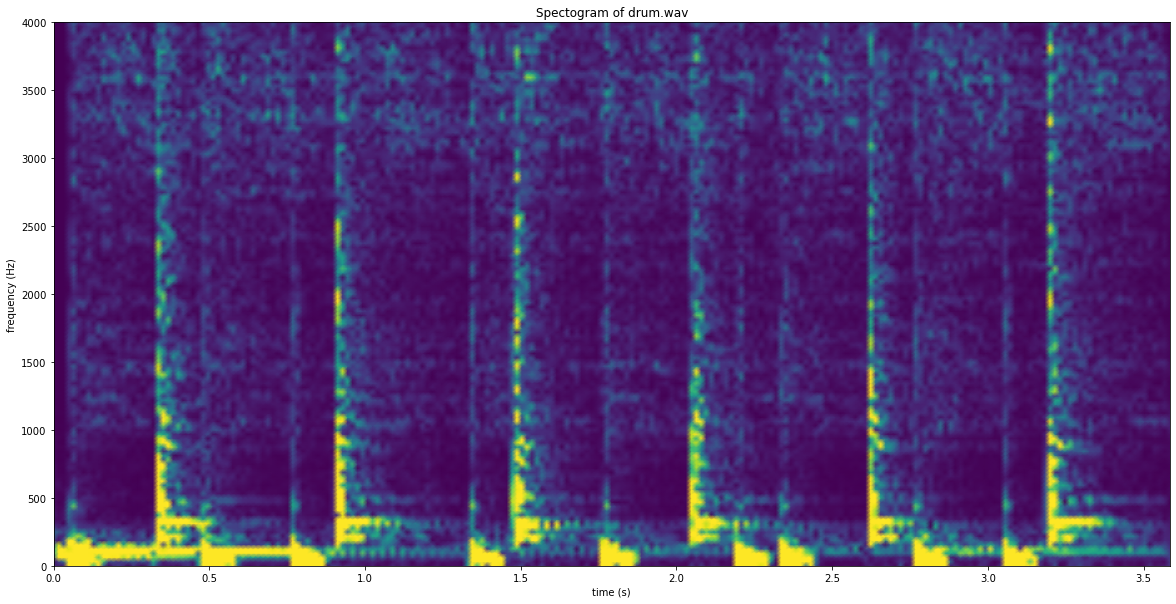

In [199]:
f_s, x = sp.io.wavfile.read("Data/drum.wav")

freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of drum.wav")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.plot(freqs, abs(x_fft))
pl.title("FFT of drum.wav")
pl.xlabel("f (Hz)")
pl.xlim(-4000, 4000)

f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 512)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 200)
pl.title("Spectogram of drum.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")
pl.ylim(0, 4000)

There are three different instruments here : 
<br>-A bass drum wich has the lowest frequency. it corresponds to the large, long, low frequency spikes in the spectogram because this instrument is less sharp than the other ones. However, there is still a vertical line each time this instrument is played but the low frequency spike lasts longer and has a higher intensity.
<br>-A snare which corresponds to the yellow vertical lines (constant spectrum i.e. dirac in time) with a few low frequency spikes. Each hit sounds pretty loud and the sound is sharper, which explains why its spectrum is close to a dirac.
<br>-A cymbal (either crash or splash I think) which has a much higher frequency. It is harder to see this instrument in the specrogram because it is always played at the same time as one of the other instruments. However, it sounds much more noisy. Thus, the cymbal might be responsible for the noise that we can see around 1000 Hz and 3000 Hz.

Once we have understood how to recognize the different instruments, we can read the spectrogram as a music sheet (at least for the snare and the bass drum) !

#### stairway.wav

(0.0, 8000.0)

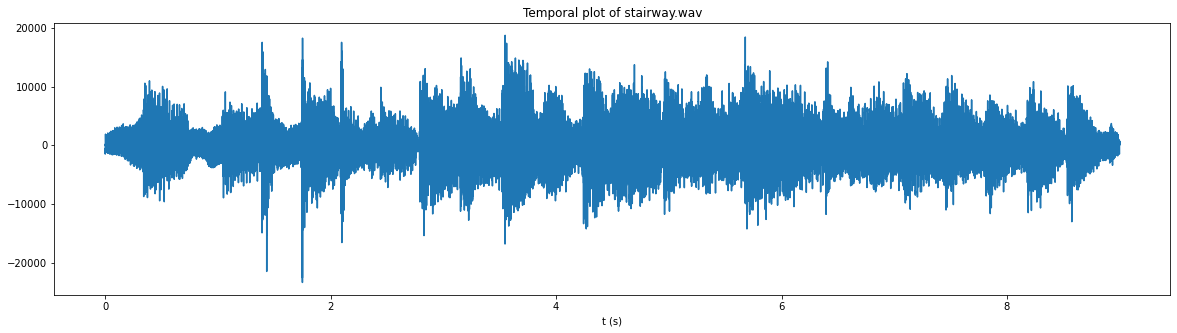

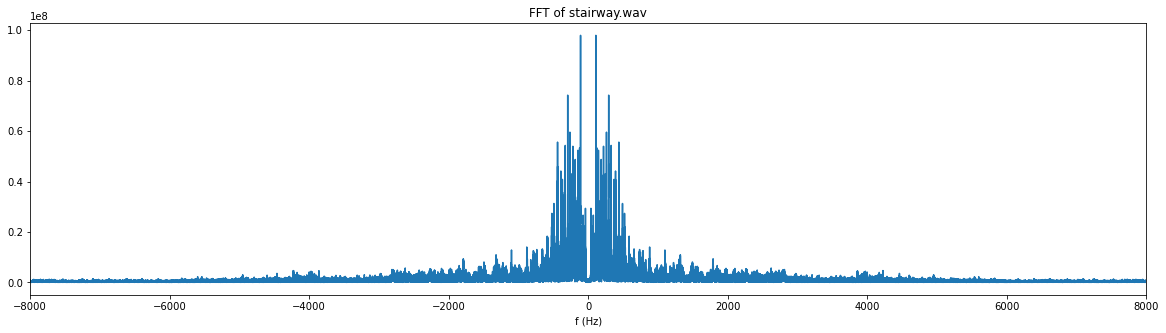

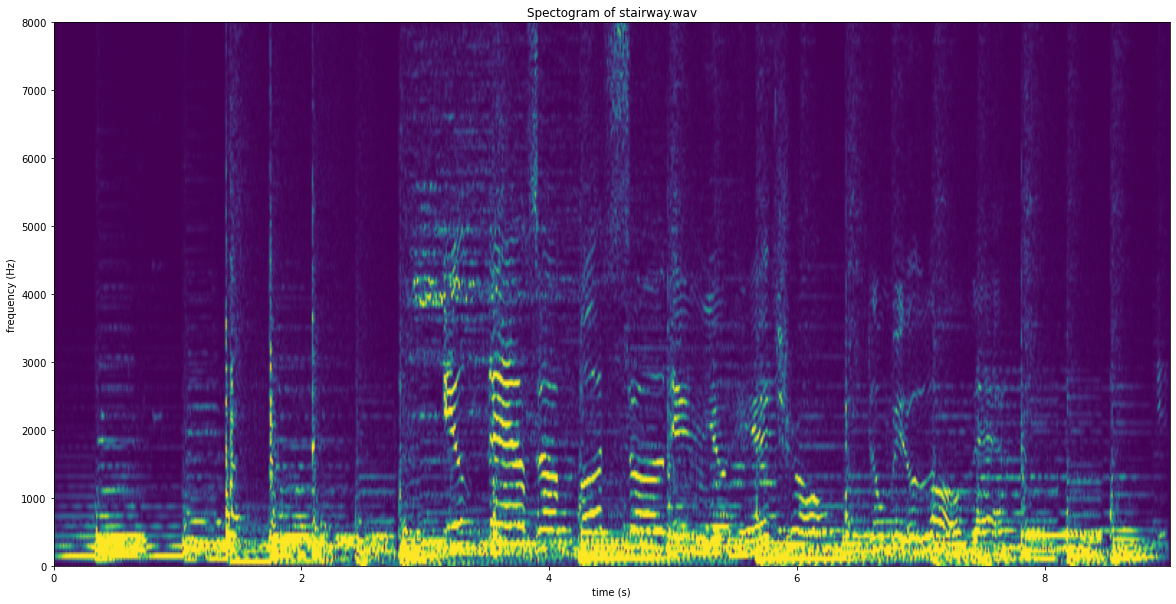

In [200]:
f_s, x = sp.io.wavfile.read("Data/stairway.wav")

freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of stairway.wav")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.plot(freqs, abs(x_fft))
pl.title("FFT of stairway.wav")
pl.xlabel("f (Hz)")
pl.xlim(-8000, 8000)

f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 1024)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 500)
pl.title("Spectogram of stairway.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")
pl.ylim(0, 8000)

Again, we can see vertical lines in the spectrogram, and they correspond to the drum which produces a lot of (mostly) regularly spaced diracs in time to build a background rythm in the music. Moreover, there is no drum (only guitar) at the beginning of the excerpt, which is why we do not see vertical lines here.
<br>The smooth variations in the spectrum correspond to the singer's voice, and they appear at the middle of the spectrogram because that's when the singer starts to sing. Also, we can see that there are a lot of harmonics corresponding to the human voice because it is a very particular sound.
<br>Finally, the straight horizontal lines correspond to the guitar. Since it is an instrument, it is more precise, which is why it produces straight lines and not curves like the singer's voice.

#### stairwayb.wav

Text(0, 0.5, 'frequency (Hz)')

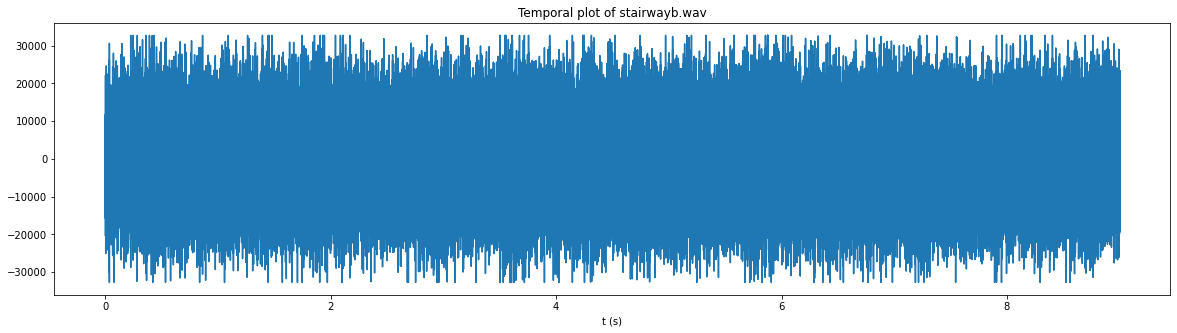

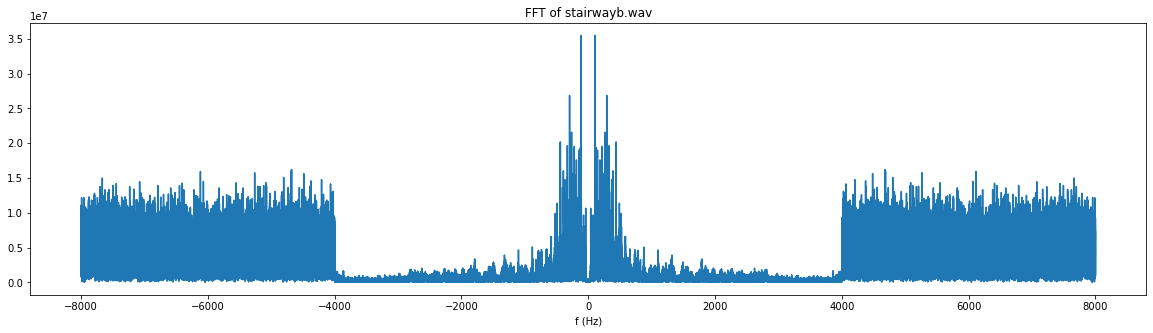

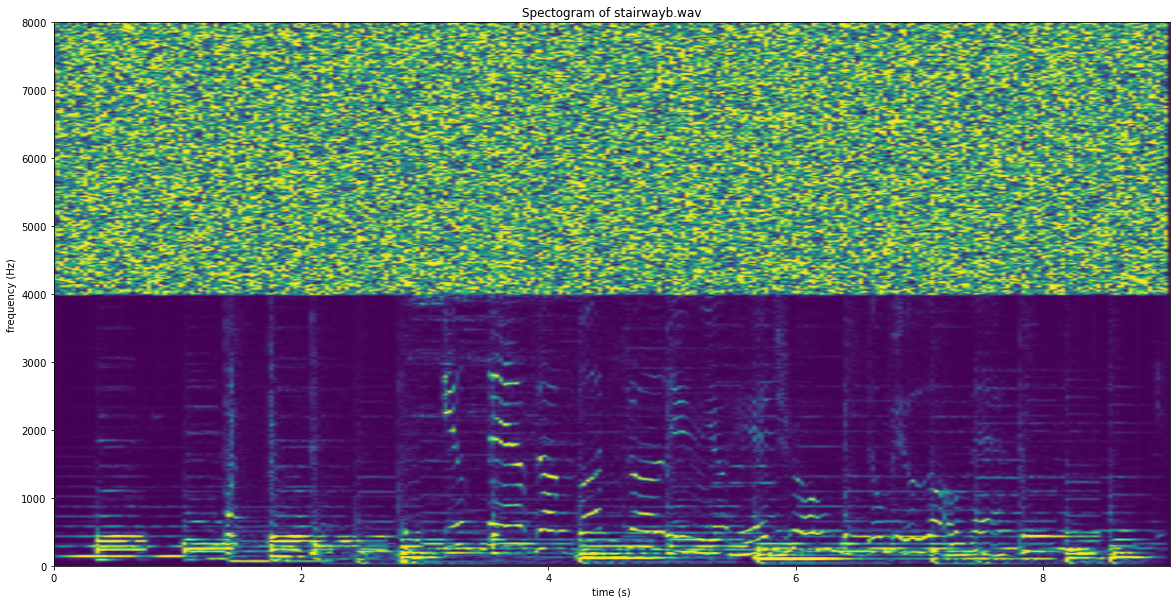

In [201]:
f_s, x = sp.io.wavfile.read("Data/stairwayb.wav")

freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of stairwayb.wav")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.plot(freqs, abs(x_fft))
pl.title("FFT of stairwayb.wav")
pl.xlabel("f (Hz)")

f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 1024)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 700)
pl.title("Spectogram of stairwayb.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")

The bottom half of the spectrogram is the same as the previous one. However, the top half (for frequencies higher than 4000 Hz) is unreadable because it is full of noise. Indeed, when listening to the sound, they are less harmonics and the frequency of the noise seems to be quite high.

#### conso.npz

Text(0, 0.5, 'frequency (Hz)')

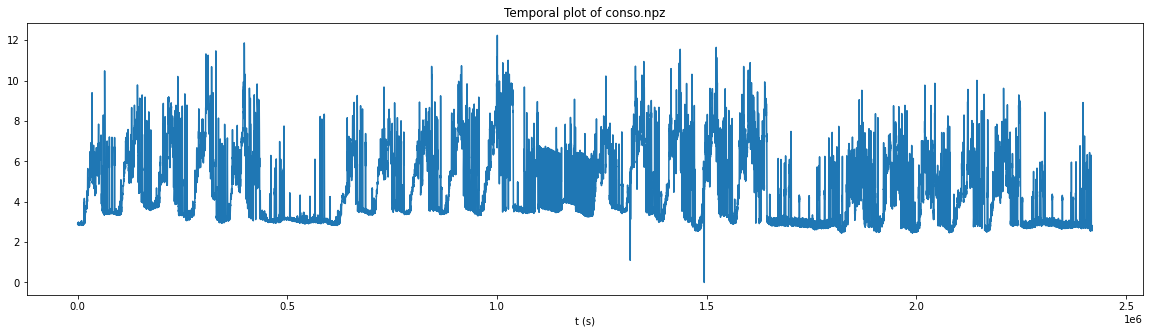

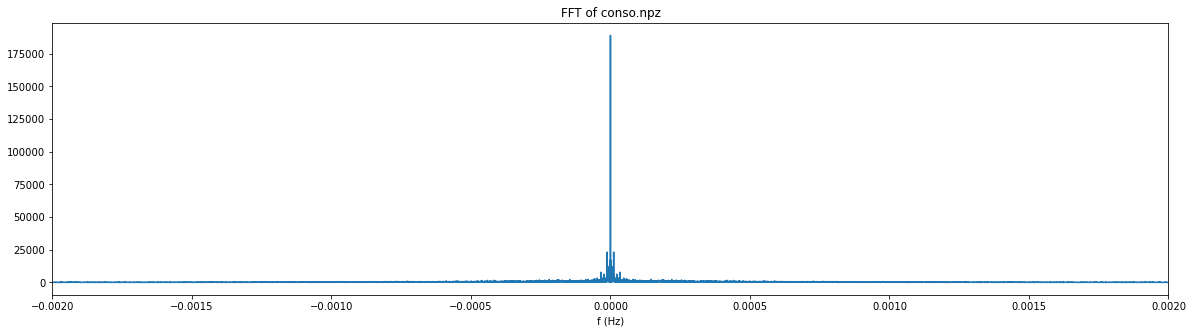

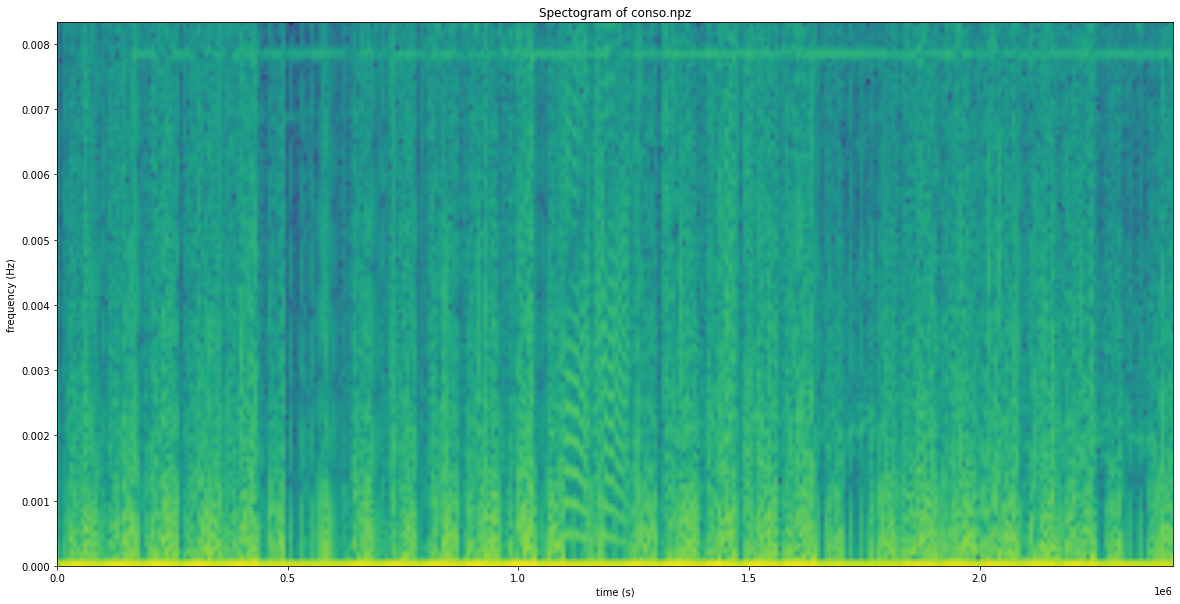

In [202]:
f = np.load("Data/conso.npz")
f_s, x = float(f['fs']), f['x']

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of conso.npz")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.title("FFT of conso.npz")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.xlim(-0.002, 0.002)

f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 256)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = LogNorm())
pl.title("Spectogram of conso.npz")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")
#pl.ylim(0, 0.002)

This time, the log scaling allows better interpretability. Otherwise, the top of the spectrogram would appear completely black because the intensity of high frequencies is very low compared to the lower ones.

We can see vertical blue lines which corresponds to a brutal diminution of the power consumation during every night.
<br>Moreover, there are large vertical bands with a lot of blue (low intensity) which correspond to the week-ends, during which the power consumation is very low.

Furthermore, the second week-end is unusual because there is more activity than usual. Also, this activity is represented as evenly spaced horizontal lines in the spectrogram, which corresponds to a dirac comb in time (the spectrum looks like a dirac comb) of period approximately 1 / 0.0005 = 2000 s which is around 30 minutes. 
<br>I don't know what they did in here, but at least I can say that the power consumption was approximately a dirac comb of period 30 minutes. They seemed to enjoy it because they did it again the next day.

Finally, the signal is quite noisy, which makes it hard to interpret it.

#### 205.npz

Text(0, 0.5, 'frequency (Hz)')

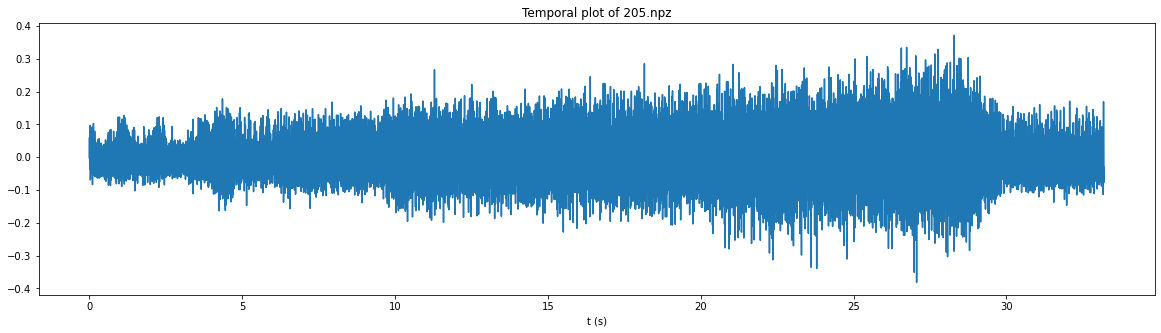

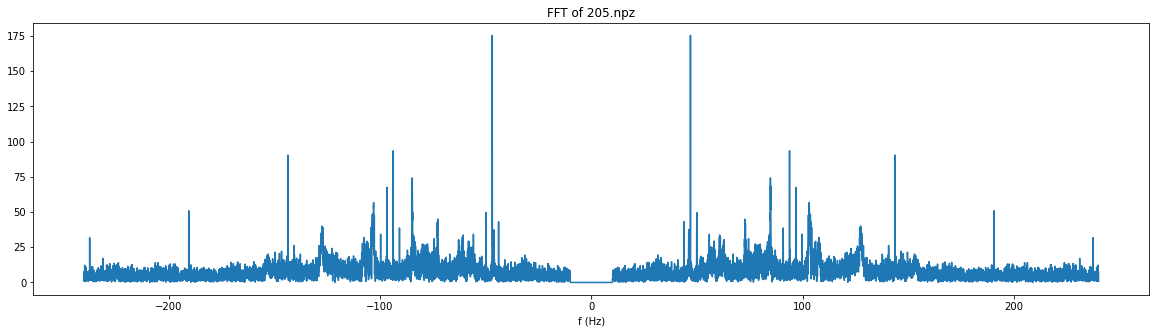

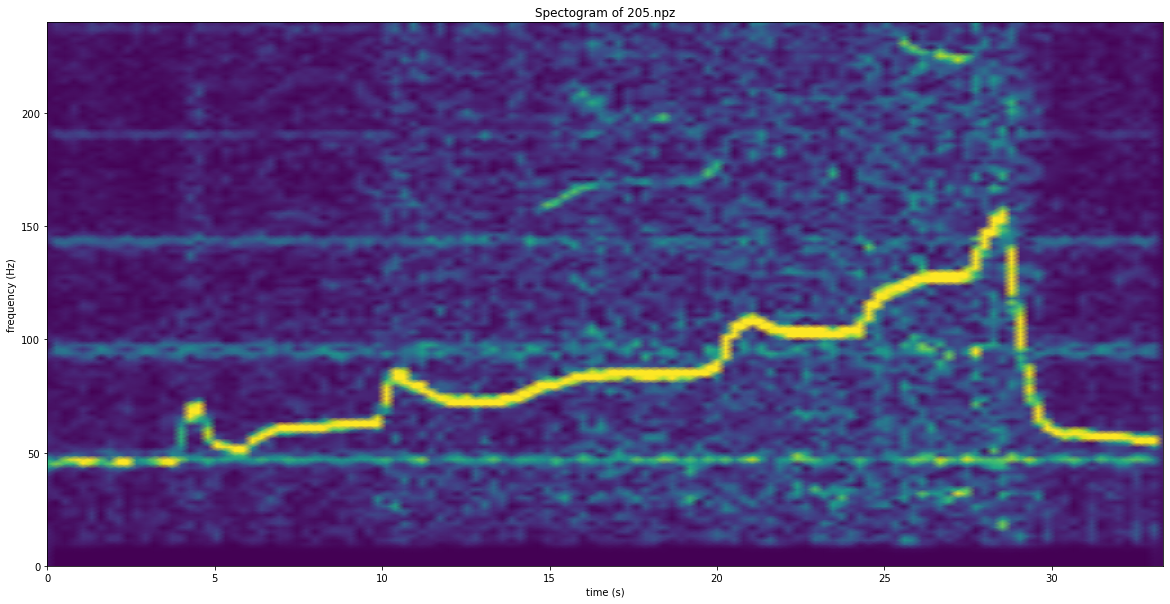

In [203]:
f = np.load("Data/205.npz")
f_s, x = float(f['fs']), f['x']

freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)

pl.figure(figsize = [20, 5])
t = np.arange(len(x)) / f_s
pl.plot(t, x)
pl.title("Temporal plot of 205.npz")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.plot(freqs, abs(x_fft))
pl.title("FFT of 205.npz")
pl.xlabel("f (Hz)")

f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 256)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 0.02)
pl.title("Spectogram of 205.npz")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")

The main source of information is this yellow curve (high intensity) in the spectrogram. which is the signal of interest. At the beginning, it has a frequency of 50 Hz, and the maximum frequency is approximately 160 Hz.
<br>Thus, the maximum RPM reached by the engine in the sequence is 750 * 160 / 50 = 2400.
<br>Moreover, there are a few spikes (4) in the temporal evolution of the yellow frequency (which is directly related to the RPM) which may correspond to the moments when you pressed the accelerator before switching the gear.
<br>Also, the higher the RPM, the noisier the signal gets.

Furthermore, there are also 4 straight horizontal lines, but I don't know what they represent but it might be related to the fact that your car has a 4-stroke engine, but I don't understand what it means.

### 1.2 Denoising with STFT

#### Question 1

In [235]:
f_s, x = sp.io.wavfile.read("Data/world_cup_2010.wav")

I can clearly hear vuvuzelas during the whole recording.

#### Question 2

Text(0, 0.5, 'frequency (Hz)')

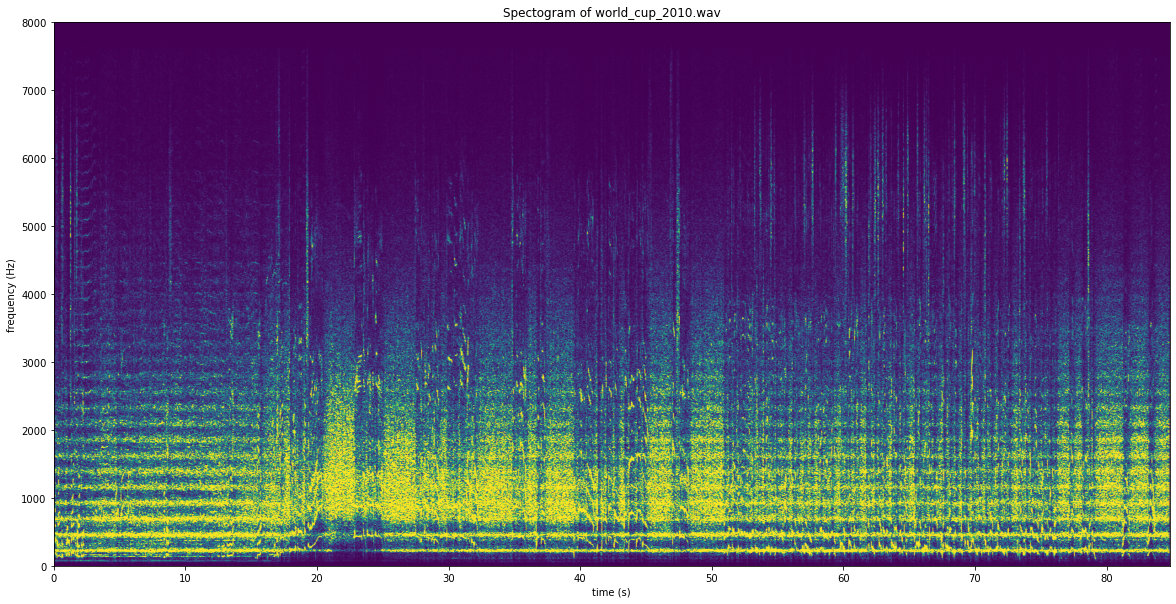

In [247]:
f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 2048)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 100)
pl.title("Spectogram of world_cup_2010.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")

In the spectrogram, I can see straight horizontal lines which might correspond to the vuvuzelas.
<br>Moreover, I can see curvy spectrums which might correspond to the human voices, especially between t = 20 s and t = 50 s when the crowd is making a lot of noise.

#### Question 3

In [254]:
a = np.searchsorted(t, 3)
b = np.searchsorted(t, 8)

psd = np.mean(Zxx[:, a:b], axis=1)

#### Question 4

In [255]:
magn = np.maximum(0, abs(Zxx) - np.sqrt(psd.reshape(-1, 1)))
Zxx_filt = magn * np.exp(1j * np.angle(Zxx))
t, x_filt = sp.signal.istft(Zxx_filt, fs = f_s)

sp.io.wavfile.write("Data/world_cup_filt.wav", f_s, x_filt / np.max(abs(x_filt)))

#### Question 5

Unfortunately, I still hear the vuvuzelas after filtering.

## 2 Audio unmixing with Non-negative Matrix factorization

#### Question 1

In [226]:
f_s, x = sp.io.wavfile.read("Data/uku_chords.wav")

We can hear different notes and sometimes they are almost played at the same time. 
<br>We can also hear your breathe at the end of the recording.

#### Question 2

(0.0, 4000.0)

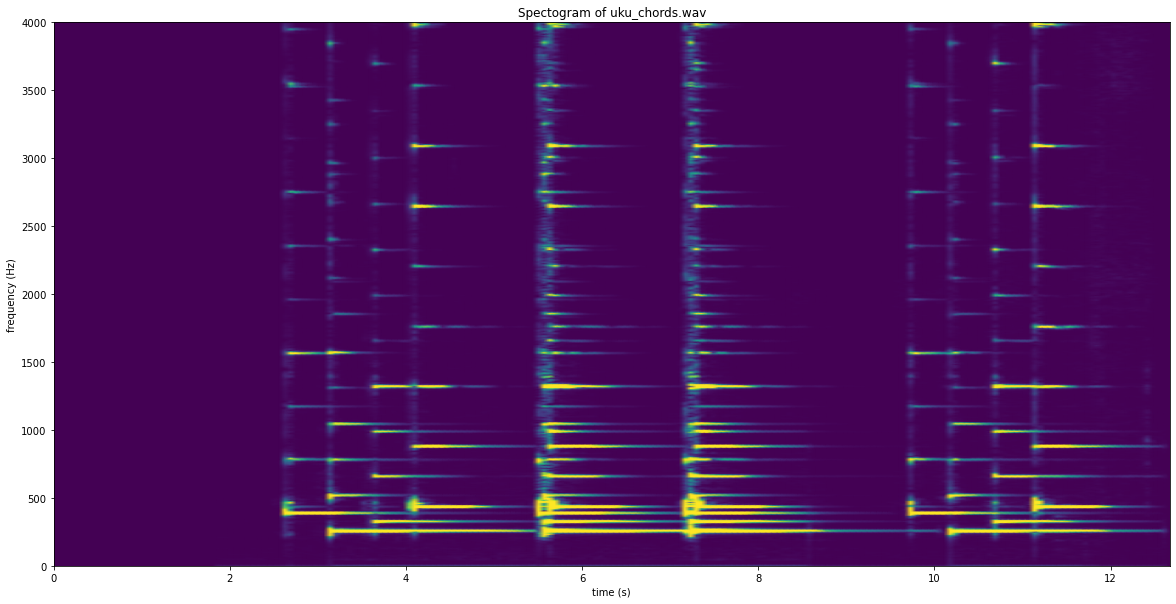

In [227]:
f, t, Zxx = sp.signal.stft(x, f_s, window = "hann", nperseg = 2048)

pl.figure(figsize = [20, 10])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', norm = None, vmax = 200)
pl.title("Spectogram of uku_chords.wav")
pl.xlabel("time (s)")
pl.ylabel("frequency (Hz)")
pl.ylim(0, 4000)

We can see the spectrums of the four first notes and of the four last notes. However,I cannot distinguish the fundamental from the harmonics.
<br>Moreover, there are two times where you play several notes at the same time, which makes it impossible to indentify the spectrums of these notes because they are totally overlapping themselves.

#### Question 3

In [228]:
p = 4

nmf = NMF(n_components = p)
A = np.transpose(nmf.fit_transform(np.transpose(abs(Zxx))))
D = np.transpose(nmf.components_)

#### Question 4

Text(0.5, 0, 't (s)')

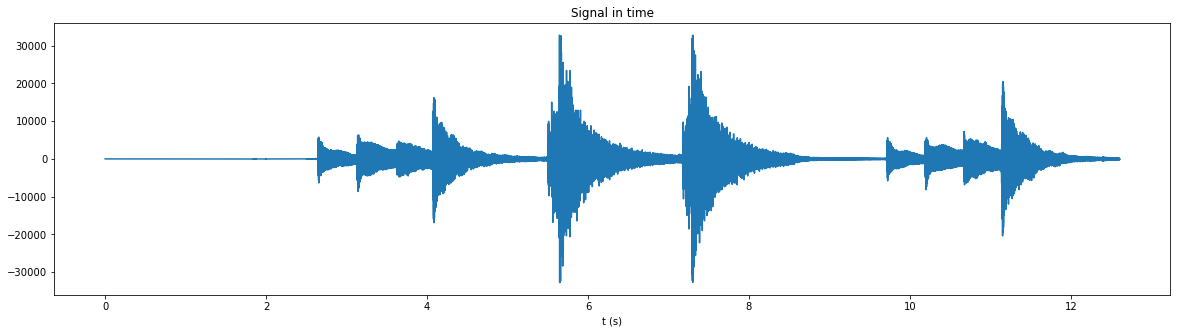

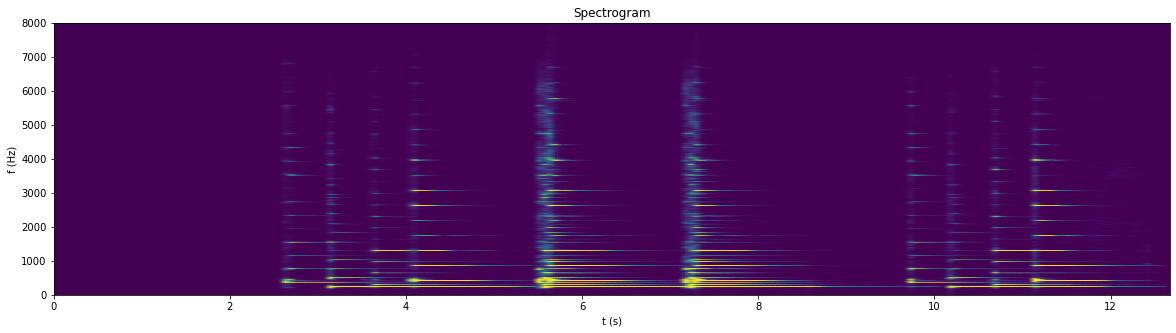

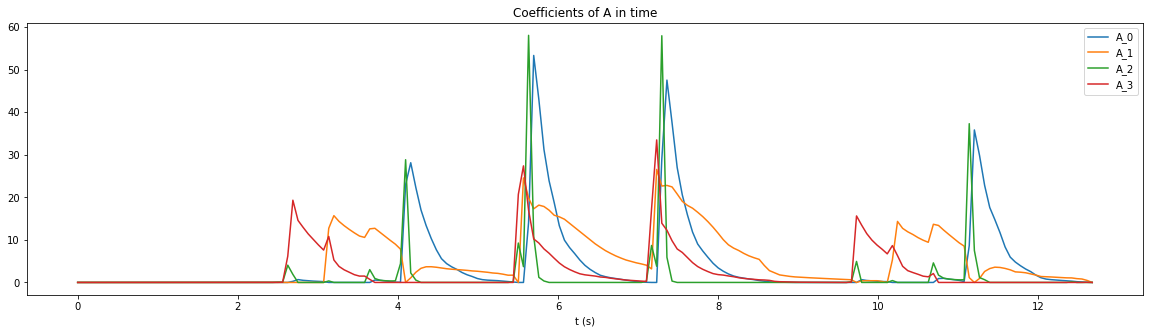

In [229]:
ts = np.arange(len(x)) / f_s

pl.figure(figsize = [20, 5])
pl.plot(ts, x)
pl.title("Signal in time")
pl.xlabel("t (s)")

pl.figure(figsize = [20, 5])
pl.pcolormesh(t, f, abs(Zxx), shading = 'gouraud', vmax = 200)
pl.title("Spectrogram")
pl.xlabel("t (s)")
pl.ylabel("f (Hz)")

pl.figure(figsize = [20, 5])
for i in range(p):
    pl.plot(t, A[i], label = "A_{}".format(i))
    pl.legend()
pl.title("Coefficients of A in time")
pl.xlabel("t (s)")


A_3 seems to correspond to the first note, A_1 corresponds to the second and third notes and A_0 and A_2 both correspond to the fourth note.

#### Question 5

Text(0.5, 1.0, 'Low rank spectrogram')

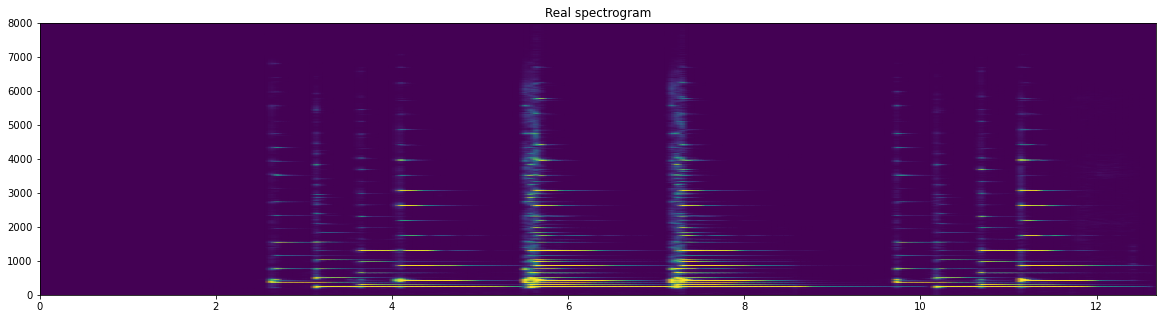

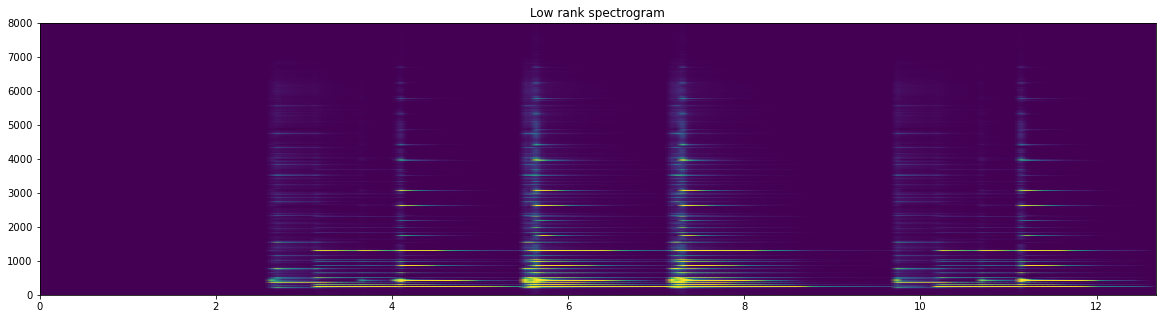

In [230]:
S = D.dot(A)

pl.figure(figsize = [20, 5])
pl.pcolormesh(t, f, np.abs(Zxx), shading = 'gouraud', vmax = 200)
pl.title("Real spectrogram")

pl.figure(figsize = [20, 5])
pl.pcolormesh(t, f, np.abs(S), shading = 'gouraud', vmax = 200)
pl.title("Low rank spectrogram")

These spectrograms are almost the same, but the low rank one seems to be less precise ans is a bit blurry.

#### Question 6

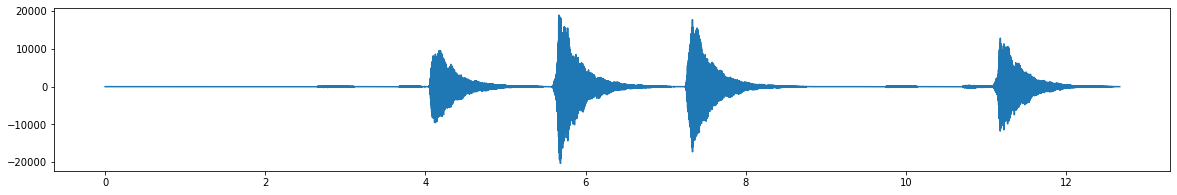

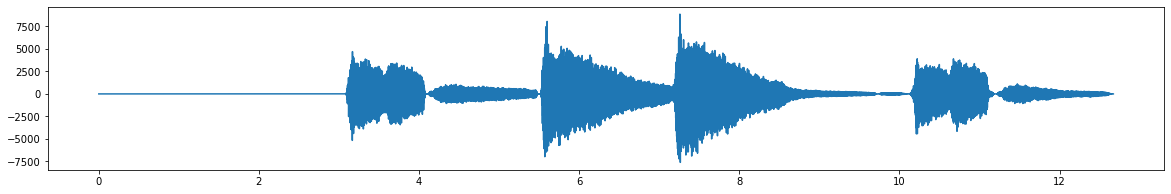

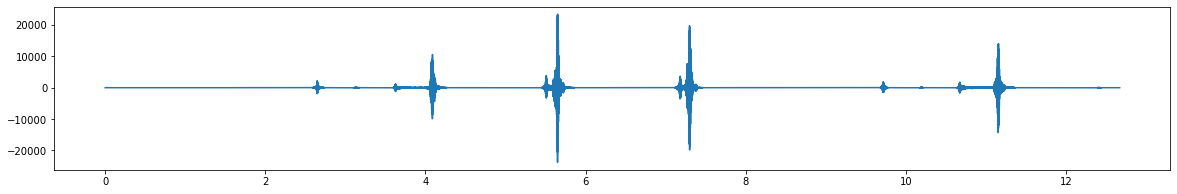

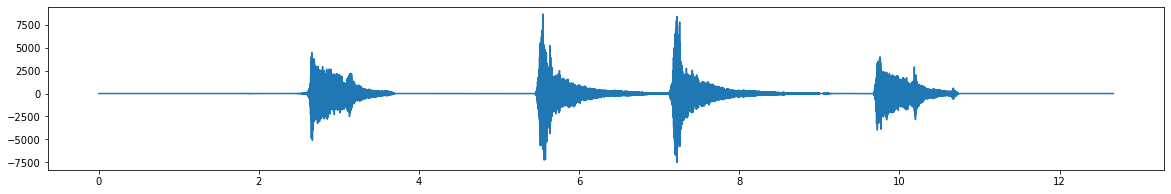

In [233]:


for k in range(p):
    pl.figure(figsize = [20, 3])
    S_k = (Zxx / abs(Zxx)) * nmf.components_[k, None].T.dot(A[k, None])
    t, source = sp.signal.istft(S_k, fs = f_s)
    sp.io.wavfile.write("Data/source_{}.wav".format(k), f_s, source / np.max(abs(source)))
    pl.plot(t, source)
    


#### Question 7

### Personal discussion

It was nice to apply what we saw during the last chapter because the lectures were pretty fast. I would have liked to know more about the interaction between signal processing and machine learning, but unfortunately we were short on time.